# Análise de segmentação de clientes usando RFM

## O que é?

A análise de RFM para segmentação de clientes é uma estratégia de marketing usada para mensurar o valor de um cliente para continuidade de um negócio, de acordo com três informações:

- Recência: o quão recentemente um cliente fez uma compra;
- Frequência: com que frequência o cliente faz uma compra; e
- Monetaridade: quanto dinheiro um cliente gasta em compras.

Essas três informações sobre um cliente 

In [2]:
# Importando as bibliotecas
%pip install --upgrade xlrd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Verificando as versões das bibliotecas utilizadas
print('Versão do Pandas -> %s' % pd.__version__)
print('Versão do Numpy -> %s' % np.__version__)
print('Versão do Seaborn -> %s' % sns.__version__)

Versão do Pandas -> 1.3.4
Versão do Numpy -> 1.20.3
Versão do Seaborn -> 0.11.2


Importando os dados já previamente tratados no Notebook 01 - Tratamento e análise exploratória dos dados

In [4]:
df = pd.read_csv("./dados/dados-tratados.csv", sep=';')
df.head()

,N°_da_fatura,Data_da_fatura,ID_Cliente,País,Quantidade,Valor,Ano_mes,Pertence_UK
0,536365,2020-12-01 08:26:00,17850,United Kingdom,40,139.12,2020-12,SIM
1,536366,2020-12-01 08:28:00,17850,United Kingdom,12,22.20,2020-12,SIM
2,536368,2020-12-01 08:34:00,13047,United Kingdom,15,70.05,2020-12,SIM
3,536367,2020-12-01 08:34:00,13047,United Kingdom,83,278.73,2020-12,SIM
4,536369,2020-12-01 08:35:00,13047,United Kingdom,3,17.85,2020-12,SIM


In [5]:
# convertendo para o tipo data a coluna 'Data_da_fatura'
df['Data_da_fatura'] = pd.to_datetime(df['Data_da_fatura']).dt.date

# 1. Calculando a Recência, Frequência e Valor Monetário

## 1.1 Calculando a **Recência** dos clientes

In [6]:
df_recencia = df.groupby(by='ID_Cliente', as_index=False)['Data_da_fatura'].max()
df_recencia.columns = ['Cliente', 'Data_ultima_compra']

data_recencia = df_recencia['Data_ultima_compra'].max()
df_recencia['Recencia'] = df_recencia['Data_ultima_compra'].apply(lambda x: (data_recencia - x).days)
df_recencia.head()


,Cliente,Data_ultima_compra,Recencia
0,12346,2021-01-18,325
1,12347,2021-12-07,2
2,12348,2021-09-25,75
3,12349,2021-11-21,18
4,12350,2021-02-02,310


## 1.2 Calculando a **Frequência** dos clientes

In [7]:
df_frequencia = df.drop_duplicates().groupby(
    by=['ID_Cliente'], as_index=False)['Data_da_fatura'].count()
df_frequencia.columns = ['Cliente', 'Frequencia']
df_frequencia.head()


,Cliente,Frequencia
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


## 1.3 Calculando o **Monetário** dos clientes

In [8]:
df_monetario = df.groupby(by='ID_Cliente', as_index=False)['Valor'].sum()
df_monetario.columns = ['Cliente', 'Monetario']
df_monetario.head()

,Cliente,Monetario
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


## 1.4 - Juntando os dados calculados em um único DataFrame

In [9]:
df_rfm = df_recencia.merge(df_frequencia, on='Cliente')
df_rfm = df_rfm.merge(df_monetario, on='Cliente')

In [10]:
df.drop(columns=['N°_da_fatura', 'Data_da_fatura', 'Quantidade', 'Valor', 'Ano_mes', 'Pertence_UK'], inplace=True)
df.drop_duplicates(inplace=True)
df.rename(columns={'ID_Cliente':'Cliente'}, inplace=True)

In [11]:
df_rfm = df.merge(df_rfm, on='Cliente')
df_rfm

,Cliente,País,Data_ultima_compra,Recencia,Frequencia,Monetario
0,17850,United Kingdom,2020-12-02,372,34,5391.21
1,13047,United Kingdom,2021-11-08,31,10,3237.54
2,12583,France,2021-12-07,2,15,7281.38
3,13748,United Kingdom,2021-09-05,95,5,948.25
4,15100,United Kingdom,2021-01-10,333,3,876.00
...,...,...,...,...,...,...
4342,13436,United Kingdom,2021-12-08,1,1,196.89
4343,15520,United Kingdom,2021-12-08,1,1,343.50
4344,13298,United Kingdom,2021-12-08,1,1,360.00
4345,14569,United Kingdom,2021-12-08,1,1,227.39


Agora com os dados de Recência, Frequência e Valor Monetário calculados, iremos ........

# 2. Criando os quartis do dataset

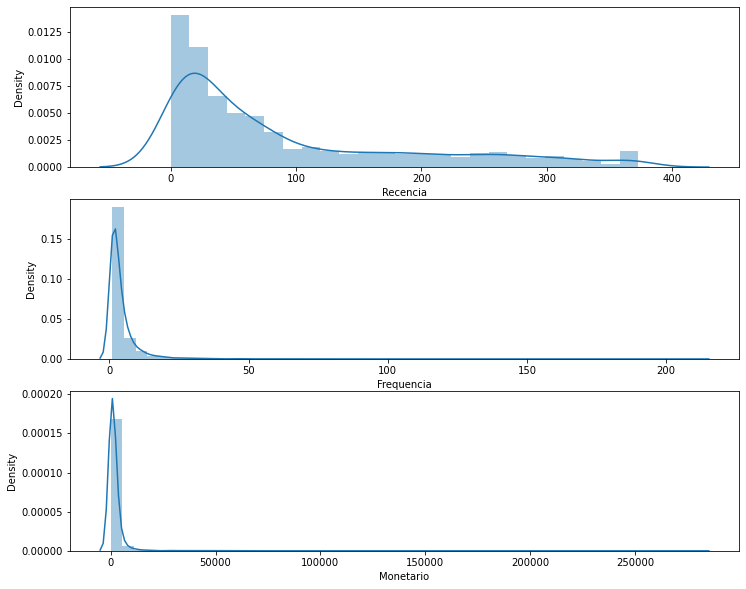

In [12]:
# Plot das distribuições de RFM
plt.figure(figsize=(12,10))

# Distribuição da Recência
plt.subplot(3, 1, 1); sns.distplot(df_rfm['Recencia'])

# Distribuição da Frequência
plt.subplot(3, 1, 2); sns.distplot(df_rfm['Frequencia'])

# Distribuição do Monetário
plt.subplot(3, 1, 3); sns.distplot(df_rfm['Monetario'])

plt.show()

Podemos perceber que os três conjuntos de dados possuem comportamento parecido com uma distribuição normal assimétrica a direita.

In [13]:
df_rfm.describe()

,Cliente,Recencia,Frequencia,Monetario
count,4347.000000,4347.000000,4347.000000,4347.000000
mean,15294.640212,91.962963,4.282494,2055.612300
std,1724.722441,99.940570,7.722808,8980.352817
min,12346.000000,0.000000,1.000000,0.000000
25%,13806.500000,17.000000,1.000000,307.470000
50%,15292.000000,50.000000,2.000000,675.270000
75%,16776.500000,141.000000,5.000000,1671.330000
max,18287.000000,373.000000,211.000000,280206.020000


Para criarmos os quartis de Recência, Frequência e Valor Monetário, iremos definir que a soma total das faturas que possuem valor igual a £0,00 não serão contabilizadas como uma venda efetuada e por isso terão Frequência alterada para 0. 

In [14]:
for i in df_rfm.index:
    if df_rfm['Monetario'][i] == 0:
        df_rfm['Frequencia'][i] = 0


C:\Users\carla\AppData\Local\Temp/ipykernel_28284/4135590379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['Frequencia'][i] = 0


In [15]:
df_rfm.describe()

,Cliente,Recencia,Frequencia,Monetario
count,4347.000000,4347.000000,4347.000000,4347.000000
mean,15294.640212,91.962963,4.282264,2055.612300
std,1724.722441,99.940570,7.722921,8980.352817
min,12346.000000,0.000000,0.000000,0.000000
25%,13806.500000,17.000000,1.000000,307.470000
50%,15292.000000,50.000000,2.000000,675.270000
75%,16776.500000,141.000000,5.000000,1671.330000
max,18287.000000,373.000000,211.000000,280206.020000


Assim, agora temos os quartis definidos:

| Categoria | Recência | Frequência | Monetário |
| --- | --- | --- | --- |
| Min | 0 | 0 | £0,00 |
| 25% | 17 | 1 | £307,47 |
| 50% | 50 | 2 | £675,27 |
| 75% | 141 | 5 | £1671,33 |
| Máx | 373 | 211 | £280.206,02 |

In [16]:
# Criando os quartis para Recência, Frequência e Monetário
df_rfm['r_quartil'] = pd.qcut(df_rfm['Recencia'], 4, ['1','2','3','4'])
df_rfm['f_quartil'] = pd.qcut(df_rfm['Frequencia'], 4, ['1','2','3','4'])
df_rfm['m_quartil'] = pd.qcut(df_rfm['Monetario'], 4, ['1','2','3','4'])

In [17]:
df_rfm.head()

,Cliente,País,Data_ultima_compra,Recencia,Frequencia,Monetario,r_quartil,f_quartil,m_quartil
0,17850,United Kingdom,2020-12-02,372,34,5391.21,4,4,4
1,13047,United Kingdom,2021-11-08,31,10,3237.54,2,4,4
2,12583,France,2021-12-07,2,15,7281.38,1,4,4
3,13748,United Kingdom,2021-09-05,95,5,948.25,3,3,3
4,15100,United Kingdom,2021-01-10,333,3,876.00,4,3,3


In [18]:
# Criando coluna "RFM" com a junção dos valores de Recência, Frequência e Monetário
df_rfm['RFM'] = df_rfm.r_quartil.astype(str)+ df_rfm.f_quartil.astype(str) + df_rfm.m_quartil.astype(str)
df_rfm.head()

,Cliente,País,Data_ultima_compra,Recencia,Frequencia,Monetario,r_quartil,f_quartil,m_quartil,RFM
0,17850,United Kingdom,2020-12-02,372,34,5391.21,4,4,4,444
1,13047,United Kingdom,2021-11-08,31,10,3237.54,2,4,4,244
2,12583,France,2021-12-07,2,15,7281.38,1,4,4,144
3,13748,United Kingdom,2021-09-05,95,5,948.25,3,3,3,333
4,15100,United Kingdom,2021-01-10,333,3,876.00,4,3,3,433


De acordo com o [artigo da Puttler](https://www.putler.com/rfm-analysis/) podemos utilizar as 11 seguintes descrições para cada categoria de clientes. Baseado nisso, já inclui a coluna "RFM" contendo os valores que utilizarei para identificar cada tipo:

| Categoria | Descrição | RFM |
| --- |--- |--- |
| Campeões | compraram recentemente, compram com frequência e gastam mais | 144 |
| Clientes fiéis | gastam bem e com boa frequência. São responsivos a promoções | 134, 143, 133 |
| Fiéis em potencial | clientes recentes, mas que gastaram um bom dinheiro e já compraram mais de uma vez | 123 e 124 |
| Novos clientes | compraram recentemente, mas não com frequência | 111, 112, 113 e 114 |
| Promessas | compradores recentes, mas que não gastaram muito | 121, 122, 212 e 222 |
| Clientes precisando de atenção | recência, frequência e valor monetário acima da curva, mas podem não ter comprado tão recentemente assim | 244 e 344 |
| Quase dormentes | recência, frequência e valor monetário abaixo da média. Tendem a se perder se não forem reativados | 232, 322, 323 e 332 |
| Em risco | gastaram bastante dinheiro e compraram com frequência, mas já há bastante tempo. Precisam retornar à base de clientes | 333, 334, 343 e 433 |
| Não pode perder | fizeram compras grandes e frequentes, mas não voltaram por muito tempo | 243, 344, 434, 443 e 444 |
| Hibernando | a última compra foi há muito tempo. Gastam pouco e fazem poucos pedidos | 311, 312, 321, 412, 421 e 422 |
| Perdidos | a menor recência, frequência e valor monetário entre todos | 411 |

In [19]:
# Criando dicionário para facilitar a categorização no Dataframe
categorias_dict = {'144':'Campeões',
              '134':'Clientes Fiéis',
              '143':'Clientes Fiéis',
              '234':'Clientes Fiéis',
              '123':'Fiéis em Potencial',
              '124':'Fiéis em Potencial', 
              '133':'Fiéis em Potencial',              
              '111':'Novos Clientes',
              '112':'Novos Clientes', 
              '113':'Novos Clientes',
              '114':'Novos Clientes',              
              '121':'Promessas',
              '122':'Promessas',
              '212':'Promessas',
              '222':'Promessas',
              '131':'Promessas',
              '132':'Promessas',
              '141':'Promessas',
              '142':'Promessas',
              '233':'Clientes Precisando de Atenção', 
              '243':'Clientes Precisando de Atenção',           
              '244':'Clientes Precisando de Atenção',
              '344':'Clientes Precisando de Atenção',
              '232':'Quase Dormentes',
              '322':'Quase Dormentes',
              '323':'Quase Dormentes',
              '342':'Quase Dormentes',
              '343':'Quase Dormentes',
              '333':'Em Risco',
              '334':'Em Risco',
              '343':'Em Risco',
              '433':'Em Risco', 
              '243':'Não Pode Perder',
              '344':'Não Pode Perder',
              '443':'Não Pode Perder',
              '434':'Não Pode Perder',
              '444':'Não Pode Perder',              
              '311':'Hibernando',
              '312':'Hibernando',
              '321':'Hibernando',
              '412':'Hibernando',
              '421':'Hibernando',
              '422':'Hibernando',
              '441':'Hibernando',
              '442':'Hibernando',
              '411':'Perdidos'              
}

# Criando coluna "Categoria" que irá salvar a classificação gerada para o cliente
df_rfm['Categoria'] = ''

# atribuindo a classificação para o cliente
for i in df_rfm.index:
    if df_rfm['RFM'][i] in categorias_dict:
        item = df_rfm['RFM'][i]
        df_rfm['Categoria'][i] = categorias_dict[item]


C:\Users\carla\AppData\Local\Temp/ipykernel_28284/655449372.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['Categoria'][i] = categorias_dict[item]


In [20]:
df_rfm.head(15)

,Cliente,País,Data_ultima_compra,Recencia,Frequencia,Monetario,r_quartil,f_quartil,m_quartil,RFM,Categoria
0,17850,United Kingdom,2020-12-02,372,34,5391.21,4,4,4,444,Não Pode Perder
1,13047,United Kingdom,2021-11-08,31,10,3237.54,2,4,4,244,Clientes Precisando de Atenção
2,12583,France,2021-12-07,2,15,7281.38,1,4,4,144,Campeões
3,13748,United Kingdom,2021-09-05,95,5,948.25,3,3,3,333,Em Risco
4,15100,United Kingdom,2021-01-10,333,3,876.00,4,3,3,433,Em Risco
5,15291,United Kingdom,2021-11-14,25,15,4668.30,2,4,4,244,Clientes Precisando de Atenção
6,14688,United Kingdom,2021-12-02,7,21,5630.87,1,4,4,144,Campeões
7,15311,United Kingdom,2021-12-09,0,91,60767.90,1,4,4,144,Campeões
8,17809,United Kingdom,2021-11-23,16,12,5411.91,1,4,4,144,Campeões
9,16098,United Kingdom,2021-09-13,87,8,2005.63,3,4,4,344,Não Pode Perder


In [26]:
df_categorias = df_rfm.groupby(by='Categoria', as_index=False)['RFM'].count()
df_categorias.rename(columns={'RFM':'Quantidade'}, inplace=True)


Categoria     object
Quantidade     int64
dtype: object

Text(0, 0.5, 'Quantidade')

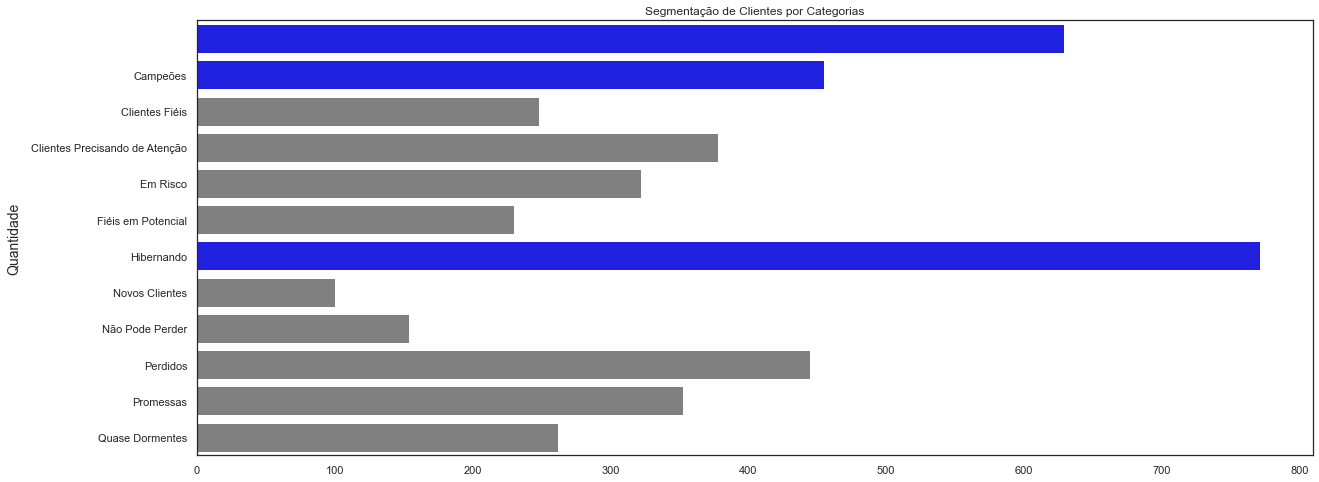

In [37]:
# selecionando o valor mínimo dos 3 maiores Montantes totais de vendas
minimo = min(df_categorias['Quantidade'].nlargest(n=3))

# colorindo de azul os 3 maiores e colorindo de cinza o restante
clrs = ['grey' if (x < minimo) else 'blue' for x in df_categorias['Quantidade']]

# criando o gráfico de barras
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (20,8))
ax = sns.barplot(y="Categoria", x="Quantidade", data=df_categorias, ci=False, palette=clrs)

ax.set_title('Segmentação de Clientes por Categorias')
ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Quantidade', fontsize=14, labelpad=10)



## Categorias utilizadas na Segmentação dos Clientes

As recomendações de ações a serem adotadas para cada categoria de clientes podem ser resumidas principalmente em:

| Categoria | Recomendação | 
|--- |--- |
| Campeões | recompense-os. Os campeões podem ser _early adopters_ de novos produtos e promoverão a marca |
| Clientes fiéis | ofereça produtos de maior valor. Peça por reviews nos produtos e faça o possível para engajá-los | 
| Fiéis em potencial | ofereça programas de membros ou de lealdade, além de recomendar outros produtos |
| Novos clientes | dê todo o suporte que precisam no onboarding, de modo que o sucesso seja atingido mais rapidamente. Comece a construir um relacionamento |
| Promessas | crie _awareness_ para a sua marca e ofereça testes ou avaliações gratuitas |
| Clientes precisando de atenção | ofereça ofertas por tempo limitado, recomendadas de acordo com compras anteriores. Assim, eles podem ser reativados |
| Quase dormentes | compartilhe recursos valiosos, recomende produtos ou renovações populares com desconto e reconecte-se com eles |
| Em risco | envie e-mails personalizados para se reconectar com eles. Ofereça renovações e proporcione recursos úteis |
| Não pode perder | conquiste-os novamente por meio de renovações ou de novos produtos. Converse com eles para evitar que reforcem a concorrência |
| Hibernando | ofereça outros produtos relevantes e descontos especiais. Assim, torna-se possível recriar o valor da marca para tais clientes |
| Perdidos | tente reviver seu interesse com campanhas. Se não funcionar, ignore |

# Referências Bibliográficas adicionais utilizadas neste projeto

[Como fazer Análise Cohort e por que ela é importante para PMs](https://www.cursospm3.com.br/blog/como-fazer-analise-cohort-e-por-que-ela-e-importante-para-pms/)

[Como fazer: Análise Cohort com Google Colab, Pandas e Seaborn em 5 passos](https://dataholds.com/como-fazer-analise-cohort-com-google-colab-pandas-e-seaborn-em-5-passos/)

[RFM Analysis For Sucessful Customer Segmentation](https://www.putler.com/rfm-analysis/)

[Introduction to Customer Segmentation in Python](https://www.datacamp.com/tutorial/introduction-customer-segmentation-python)

